# ABA and NBA Player Data Analysis

# What are 10 (or more) questions that you hope to answer through your data analysis?

No. | Question
-|-
2 | Is it better for a point guard to score more points or to get more assist ?
3 | Does a player's height have any effect on that player's shooting averages, like say their free-throw percentage?
4 | Is there any correlation between a player's free-throw percentage and their three-point shooting percentage? If so, is it positive or negative?
5 | If a point guard scores more points, do they in turn give out less assist?
6 | What position is the most efficient at scoring in the NBA?
7 | What position is the most prolific with scoring in the NBA?
8 | Does scoring distribution across positions vary from team to team in the NBA?
9 | It has always been said that if you "feed the big man" they will be more productive. Do forwards in the league who score more also get more rebounds and/or more assist?
10 | Is there a correlation between turnovers and fouls committed by a player? If so, is it positive or negative?
11 | Do players who play at certain colleges perform better in the league?

In [1]:
import pandas
import seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


pandas.options.display.max_columns = None
pandas.options.display.max_rows = None
seaborn.set(rc={'figure.figsize':(10,10)})

# data spans from ABA and NBA (1948 to current [June 2022])
nba_players = pandas.read_csv("NBA_players_clean.csv")

nba_players.head(10)

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,TRB,AST,FG%,FG3%,FT%,eFG%,PER,WS,All Star,All NBA,All ABA,All Rookie,All Defensive,BLK Champ,STL Champ,TRB Champ,AST Champ,Scoring Champ,Most Improved,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team
0,Alaa Abdelnaby,1991,1995,5,F-C,6-10,6.833333,240.0,256,5.7,3.3,0.3,50.2,0.0,70.1,50.2,13.0,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Zaid Abdul-Aziz,1969,1978,10,F-C,6-9,6.750000,235.0,505,9.0,8.0,1.2,42.8,17.7,72.8,48.4,15.1,17.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Kareem Abdul-Jabbar*,1970,1989,20,C,7-2,7.166667,225.0,1560,24.6,11.2,3.6,55.9,5.6,72.1,55.9,24.6,273.4,19,15,0,1,11,4,0,1,0,2,0,0,0,1,0,0,2,6,6,1,0
3,Mahmoud Abdul-Rauf,1991,2001,11,G,6-1,6.083333,162.0,586,14.6,1.9,3.5,44.2,35.4,90.5,47.2,15.4,25.2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Tariq Abdul-Wahad,1998,2003,6,F,6-6,6.500000,223.0,236,7.8,3.3,1.1,41.7,23.7,70.3,42.2,11.4,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Shareef Abdur-Rahim,1997,2008,12,F,6-9,6.750000,225.0,830,18.1,7.5,2.5,47.2,29.7,81.0,47.9,19.0,71.2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Tom Abernethy,1977,1981,5,F,6-7,6.583333,220.0,319,5.6,3.2,1.2,49.2,0.0,74.7,49.2,12.9,13.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Forest Able,1957,1957,1,G,6-3,6.250000,180.0,1,0.0,1.0,1.0,0.0,27.9,73.7,44.1,-41.5,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,John Abramovic,1947,1948,2,F,6-3,6.250000,195.0,56,9.5,3.0,0.7,23.7,23.4,68.6,45.3,10.9,-1.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Álex Abrines,2017,2019,3,G-F,6-6,6.500000,200.0,174,5.3,1.4,0.5,38.7,36.8,88.0,52.5,8.8,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# The Features of the Dataset (each column label) 

<h3><font color='red'> Player → The name of the player </font></h3>
<h3><font color='red'> From → The year the player was drafted </font></h3>
<h3><font color='red'> To → The year the player retired </font></h3>
<h3><font color='red'> Pos → The position the player player (guard, forward, or center) </font></h3>
<h3><font color='red'> Ht → The player's height (height and inches) </font></h3>
<h3><font color='red'> Height → The player's height (feet only, decimal values) </font></h3>
<h3><font color='red'> Wt → The player's weight in pounds </font></h3>
<h3><font color='red'> G → The number of NBA games the player participated in </font></h3>
<h3><font color='red'> PTS → The player's career average for points scored per game </font></h3>
<h3><font color='red'> TRB → The player's career average for total rebounds per game </font></h3> 
<h3><font color='red'> AST → The player's career average for assist given per game </font></h3>
<h3><font color='red'> FG% → The player's career field goal percentage (how many shots they made over how many they attempted)</font></h3>
<h3><font color='red'> FG3% → The player's career three point field goal percentage (how many three point shots they made over how many they attempted)</font></h3>
<h3><font color='red'> FT% → The player's career free throw shooting percentage (how many free throws they made over how many they attempted)</font></h3>
<h3><font color='red'> eFG% → The player's career effective field goal percentage. This is an advanced NBA statistic which accounts for the fact that a three-point field shot is worth more than a two-pointer. The formula is (FGM + 0.5 * 3PM) / FGA.</font></h3>
<h3><font color='red'> PER → The player's career player efficiency rating. This is an advance NBA statistic that outputs a per-minute rating developed by ESPN.com columnist John Hollinger. In John's words, "The PER sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance."</font></h3>
<h3><font color='red'> WS → The player's career total win shares. This is an advance NBA statistic estimating how many wins a player is responsible for on his team. Usually, this number is calculated using an entire season’s worth of games for a team. In each win for that season, the amount each player was responsible for is set aside using other advanced metrics.</font></h3>
<h3><font color='red'> All Star → The number of All-Star team selections the player earned during their career</font></h3>
<h3><font color='red'> All NBA → The number of All-NBA team selections the player earned during their career</font></h3>
<h3><font color='red'> All NBA → The number of All-ABA team selections the player earned during their career</font></h3>
<h3><font color='red'> All Rookie → Did this player make the All-Rookie team their first season in the league? (O = yes , 1 = no)</font></h3>
<h3><font color='red'> All Defensive → The number of All-Defensive team selections the player earned during their career</font></h3>
<h3><font color='red'> BLK Champ → The number of times the player lead the league in blocks per game</font></h3>
<h3><font color='red'> STL Champ → The number of times the player lead the league in steals per game</font></h3>
<h3><font color='red'> TRB Champ → The number of times the player lead the league in rebounds per game</font></h3>
<h3><font color='red'> AST Champ → The number of times the player lead the league in assists per game</font></h3>
<h3><font color='red'> Scoring Champ → The number of times the player lead the league in points per game</font></h3>
<h3><font color='red'> Most Improved → Did this player ever receive the Most Improved Player award? (O = yes , 1 = no)</font></h3>
<h3><font color='red'> Sixth Man → The number of times the player won the sixth man of the year award</font></h3>
<h3><font color='red'> DPOY → The number of times the player won the defensive player of the year award</font></h3>
<h3><font color='red'> ROY → Did this player receive the Rookie of the Year award their first season? (O = yes , 1 = no)</font></h3>
<h3><font color='red'> AS MVP → The number of times the player was selected as the MVP of the All-Star game</font></h3>
<h3><font color='red'> CF MVP → The number of times the player was selected as the MVP of a conference finals playoff series</font></h3>
<h3><font color='red'> Final MVP → The number of times the player was selected as the MVP of the NBA Finals playoff series</font></h3>
<h3><font color='red'> MVP → The number of times the player was selected as the MVP of league during the regular season</font></h3>
<h3><font color='red'> Championships → The number of times the player was on a team that won the NBA Finals</font></h3>
<h3><font color='red'> NBA 75 Team → Was this player selected as one of the 75 greatest basketball players of all time? (O = yes , 1 = no)</font></h3>
<h3><font color='red'> ABA All-Time Team → Was this player selected as one of the greatest basketball players to play in the ABA? (O = yes , 1 = no)</font></h3>

# Question 1: Is it better for a point guard to score more points or to get more assist ?
* we can look at some of the advanced stats in comparison to the number of points and assist a guard may get
* we will have to seperate our data into just the guard position

In [2]:
pass

# Question 3: Does a player's height have any effect on that player's shooting averages, like say their free-throw percentage?

* players name
* players height
* players shooting averages
* looking for correlation

In [3]:
# slice the data to get only features of concern
q3_data = nba_players[["Player", "Height", "FT%", "FG%", "FG3%"]]

q3_data.sample(10)

,Player,Height,FT%,FG%,FG3%
711,Anthony Carter,6.083333,70.6,40.4,25.0
2940,Kevin McHale*,6.833333,79.8,55.4,26.1
2718,Gabriel Lundberg,6.333333,73.7,26.3,37.5
1561,Kendall Gill,6.416667,75.4,43.4,30.0
3431,Anthony Parker,6.500000,79.4,44.4,40.4
4282,Bill Stricker,6.750000,67.6,66.7,23.4
3930,Woody Sauldsberry,6.583333,61.0,34.8,17.7
4766,Jerome Whitehead,6.833333,71.8,49.7,0.0
764,Zylan Cheatham,6.416667,67.6,50.0,0.0
4007,Ansu Sesay,6.750000,64.0,43.4,27.6


<AxesSubplot:>

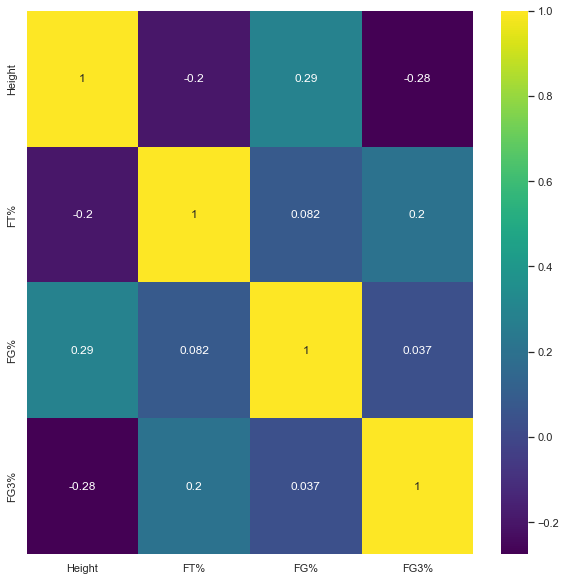

In [4]:
# visualize the sliced data to show correlation
seaborn.heatmap(q3_data.corr(), annot = True, cmap = 'viridis')

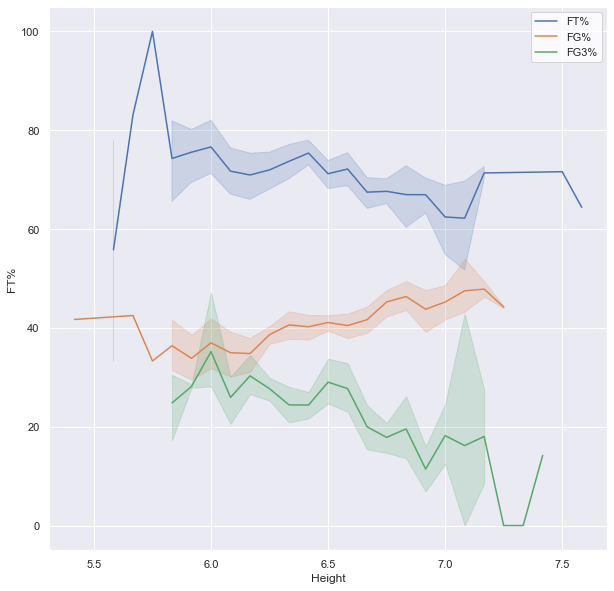

In [5]:
# visualize the sliced data to show height to shooting average mapping
fig, ax = plt.subplots(figsize=(10, 10))

g = seaborn.lineplot(x=q3_data["Height"].sample(500), y = q3_data["FT%"], ax = ax)
g2 = seaborn.lineplot(x=q3_data["Height"].sample(500), y = q3_data["FG%"], ax = ax)
g3 = seaborn.lineplot(x=q3_data["Height"].sample(500), y = q3_data["FG3%"], ax = ax)

ax.legend(['FT%', 'FG%', "FG3%"], facecolor='w')

plt.show()

## Through my analysis I have found that it seems that generally as players' height increases then their free throw shooting percentage tends to decrease, if only slightly. Through careful obesrvation on the displayed linegraph, anomalies of taller players with better shooting averages can be found. However, through analysis of several random samples, there is mostly a negative correlation between a player's height and their free throw percentage, indicated by line sloping downward and the -0.2 correlation value given in the heatmap.

In [6]:
''' Answering question 4: Is there any correlation between a player's free-throw percentage and their three-point shooting percentage? If so, is it positive or negative?
'''
pass

In [7]:
''' Answering question 5: If a guard scores more points, do they in turn give out less assist?

* focusing on guard position
* points
* assist
* correlation -- expecting negative correlation

NBA position unique values: array(['F-C', 'C', 'G', 'F', 'G-F'], dtype=object)

Harder solution to dataframe change:

i = 0
pts_list = []
ast_list = []
while i < len(q5_data):
    
    row = list(q5_data.iloc[i])
    total_pts = int(row[2] * row[1])
    total_ast = int(row[3] * row[1])
    pts_list.append(total_pts)
    ast_list.append(total_ast)
    i += 1
    
q5_data["TOTAL_PTS"] = pts_list
q5_data["TOTAL_AST"] = ast_list
new_q5 = q5_data.drop(columns=["PTS", "AST", "G"])
'''

# Option 1: Using on players who are the "G" or guard position
guards = nba_players[ nba_players["Pos"] == "G" ]
q5_data = guards[["Player", "G", "PTS", "AST"]]

pts_list = []
ast_list = []

for index, row in q5_data.iterrows():
    total_pts = int(row["PTS"] * row["G"])
    total_ast = int(row["AST"] * row["G"])
    pts_list.append(total_pts)
    ast_list.append(total_ast)

q5_data["TOTAL_PTS"] = pts_list
q5_data["TOTAL_AST"] = ast_list

# Option 2: using both "G" (guards) and "G-F" (guard hybrids)

q5_data.head()

/var/folders/86/zrq2dzkd3t7bckvymt2y918h0000gp/T/ipykernel_75452/1194608638.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q5_data["TOTAL_PTS"] = pts_list
/var/folders/86/zrq2dzkd3t7bckvymt2y918h0000gp/T/ipykernel_75452/1194608638.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q5_data["TOTAL_AST"] = ast_list


,Player,G,PTS,AST,TOTAL_PTS,TOTAL_AST
3,Mahmoud Abdul-Rauf,586,14.6,3.5,8555,2051
7,Forest Able,1,0.0,1.0,0,1
11,Alex Acker,30,2.7,0.5,81,15
12,Don Ackerman,28,1.5,0.8,42,22
19,Hassan Adams,73,2.5,0.2,182,14


In [8]:
''' Answering question 6: What position is the most efficient at scoring in the NBA?
'''
pass

In [9]:
''' Answering question 7: What position is the most prolific with scoring in the NBA?
'''
pass

In [10]:
''' Answering question 8: What position is the most prolific with scoring in the NBA?
'''

guards = nba_players[ nba_players['Pos'] == "G"]
forwards = nba_players[ nba_players['Pos'] == "F" ]
centers = nba_players[ nba_players['Pos'] == "C" ]
hybrid_big = nba_players[ nba_players['Pos'] == "F-C" ]

g_pts = guards['PTS'].sum()
f_pts = forwards['PTS'].sum()
c_pts = centers['PTS'].sum()
h_pts = hybrid_big["PTS"].sum()

g_pts, f_pts, c_pts, h_pts

(11323.100000000002, 7716.799999999999, 2749.6, 5127.9)

In [11]:
''' Answering question 9: It has always been said that if you "feed the big man" they will be more productive. Do forwards in the league who score more also get more rebounds and/or more assist?
'''
pass

In [12]:
''' Answering question 10: Is there a correlation between turnovers and fouls committed by a player? If so, is it positive or negative?
'''
pass

In [13]:
''' Answering question 11: Do players who play at certain colleges perform better in the league?
'''
pass